In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('PEP1.csv')
train.shape

(1460, 81)

In [3]:
train.head(3).T

,0,1,2
Id,1,2,3
MSSubClass,60,20,60
MSZoning,RL,RL,RL
LotFrontage,65.0,80.0,68.0
LotArea,8450,9600,11250
...,...,...,...
MoSold,2,5,9
YrSold,2008,2007,2008
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
train.drop(columns=['Id'], inplace=True)

In [7]:
columns_with_miss = train.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 19


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# Removing columns
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

In [9]:
train['FireplaceQu'].fillna(0, inplace=True)
train['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

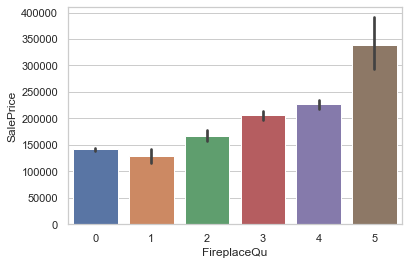

In [10]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train)

In [11]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
train[c].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


In [12]:
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
train.drop(columns=cols_to_be_removed, inplace=True)

In [13]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 11


GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64

In [14]:
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    train[c].fillna('NA', inplace=True)
    
# Fills None in place of NaN
train['MasVnrType'].fillna('None', inplace=True)

In [15]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 5


GarageQual    81
GarageCond    81
BsmtQual      37
BsmtCond      37
Electrical     1
dtype: int64

In [16]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    train[col].fillna(0, inplace=True)
    train[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

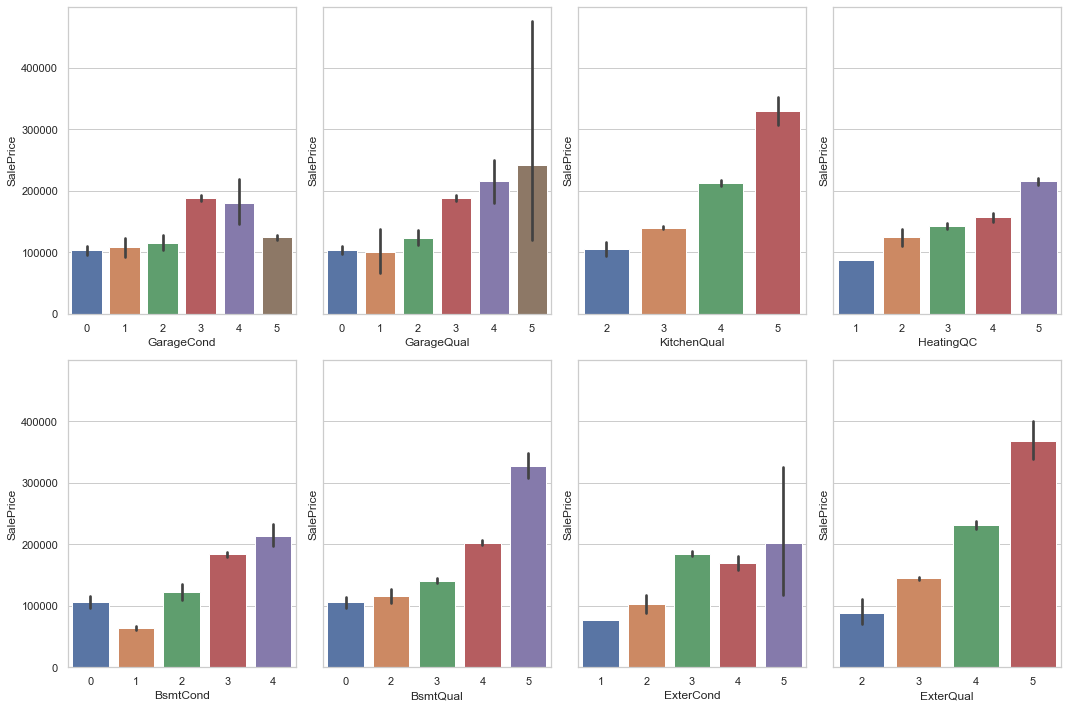

In [17]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [18]:
cols = train.columns
num_cols = train._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(train[c].value_counts())

sorted_value_counts = {k: v for k, v in sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 30


{'Street': 2,
 'CentralAir': 2,
 'Utilities': 2,
 'LandSlope': 3,
 'PavedDrive': 3,
 'LandContour': 4,
 'GarageFinish': 4,
 'MasVnrType': 4,
 'LotShape': 4,
 'Electrical': 5,
 'MSZoning': 5,
 'BsmtExposure': 5,
 'LotConfig': 5,
 'BldgType': 5,
 'SaleCondition': 6,
 'Foundation': 6,
 'Heating': 6,
 'RoofStyle': 6,
 'Functional': 7,
 'GarageType': 7,
 'BsmtFinType2': 7,
 'BsmtFinType1': 7,
 'Condition2': 8,
 'RoofMatl': 8,
 'HouseStyle': 8,
 'SaleType': 9,
 'Condition1': 9,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Neighborhood': 25}

In [19]:
nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(train[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

print(f'Nominal columns with less than 6 values: {len(nom_cols_less_than_6)}')

Nominal columns with less than 6 values: 18


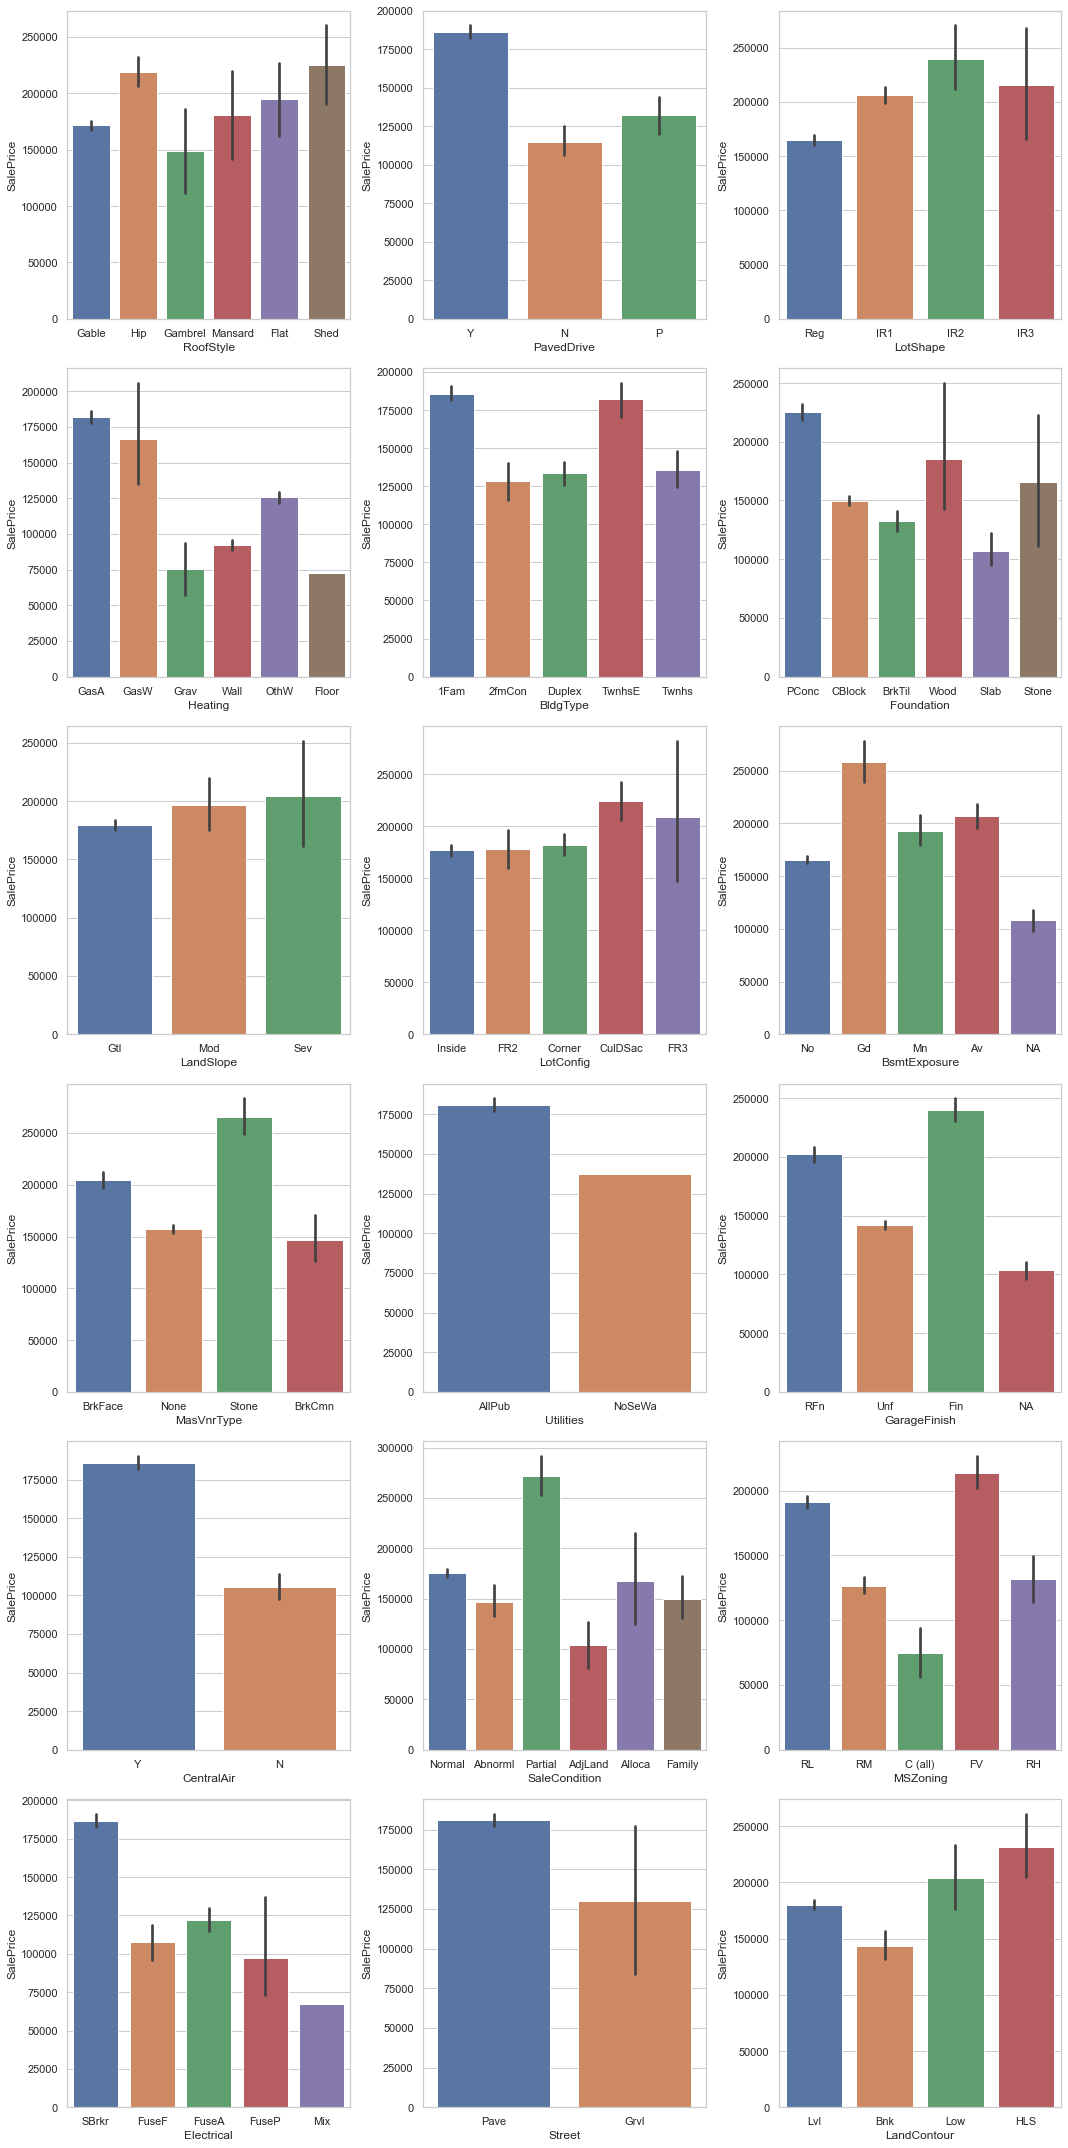

In [20]:
ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not nom_cols_less_than_6:
            continue
        sns.barplot(x=nom_cols_less_than_6.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [21]:
# Inputs more frequent value in place of NaN

train['Electrical'].fillna('SBrkr', inplace=True)

In [22]:
train.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
FireplaceQu       690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageCond         81
GarageCars         81
GarageArea         81
GarageQual         81
TotalBsmtSF        37
BsmtQual           37
BsmtCond           37
FullBath            9
dtype: int64

In [23]:
# Get only numerical columns
numerical_columns = list(train.dtypes[train.dtypes == 'int64'].index)
len(numerical_columns)

43

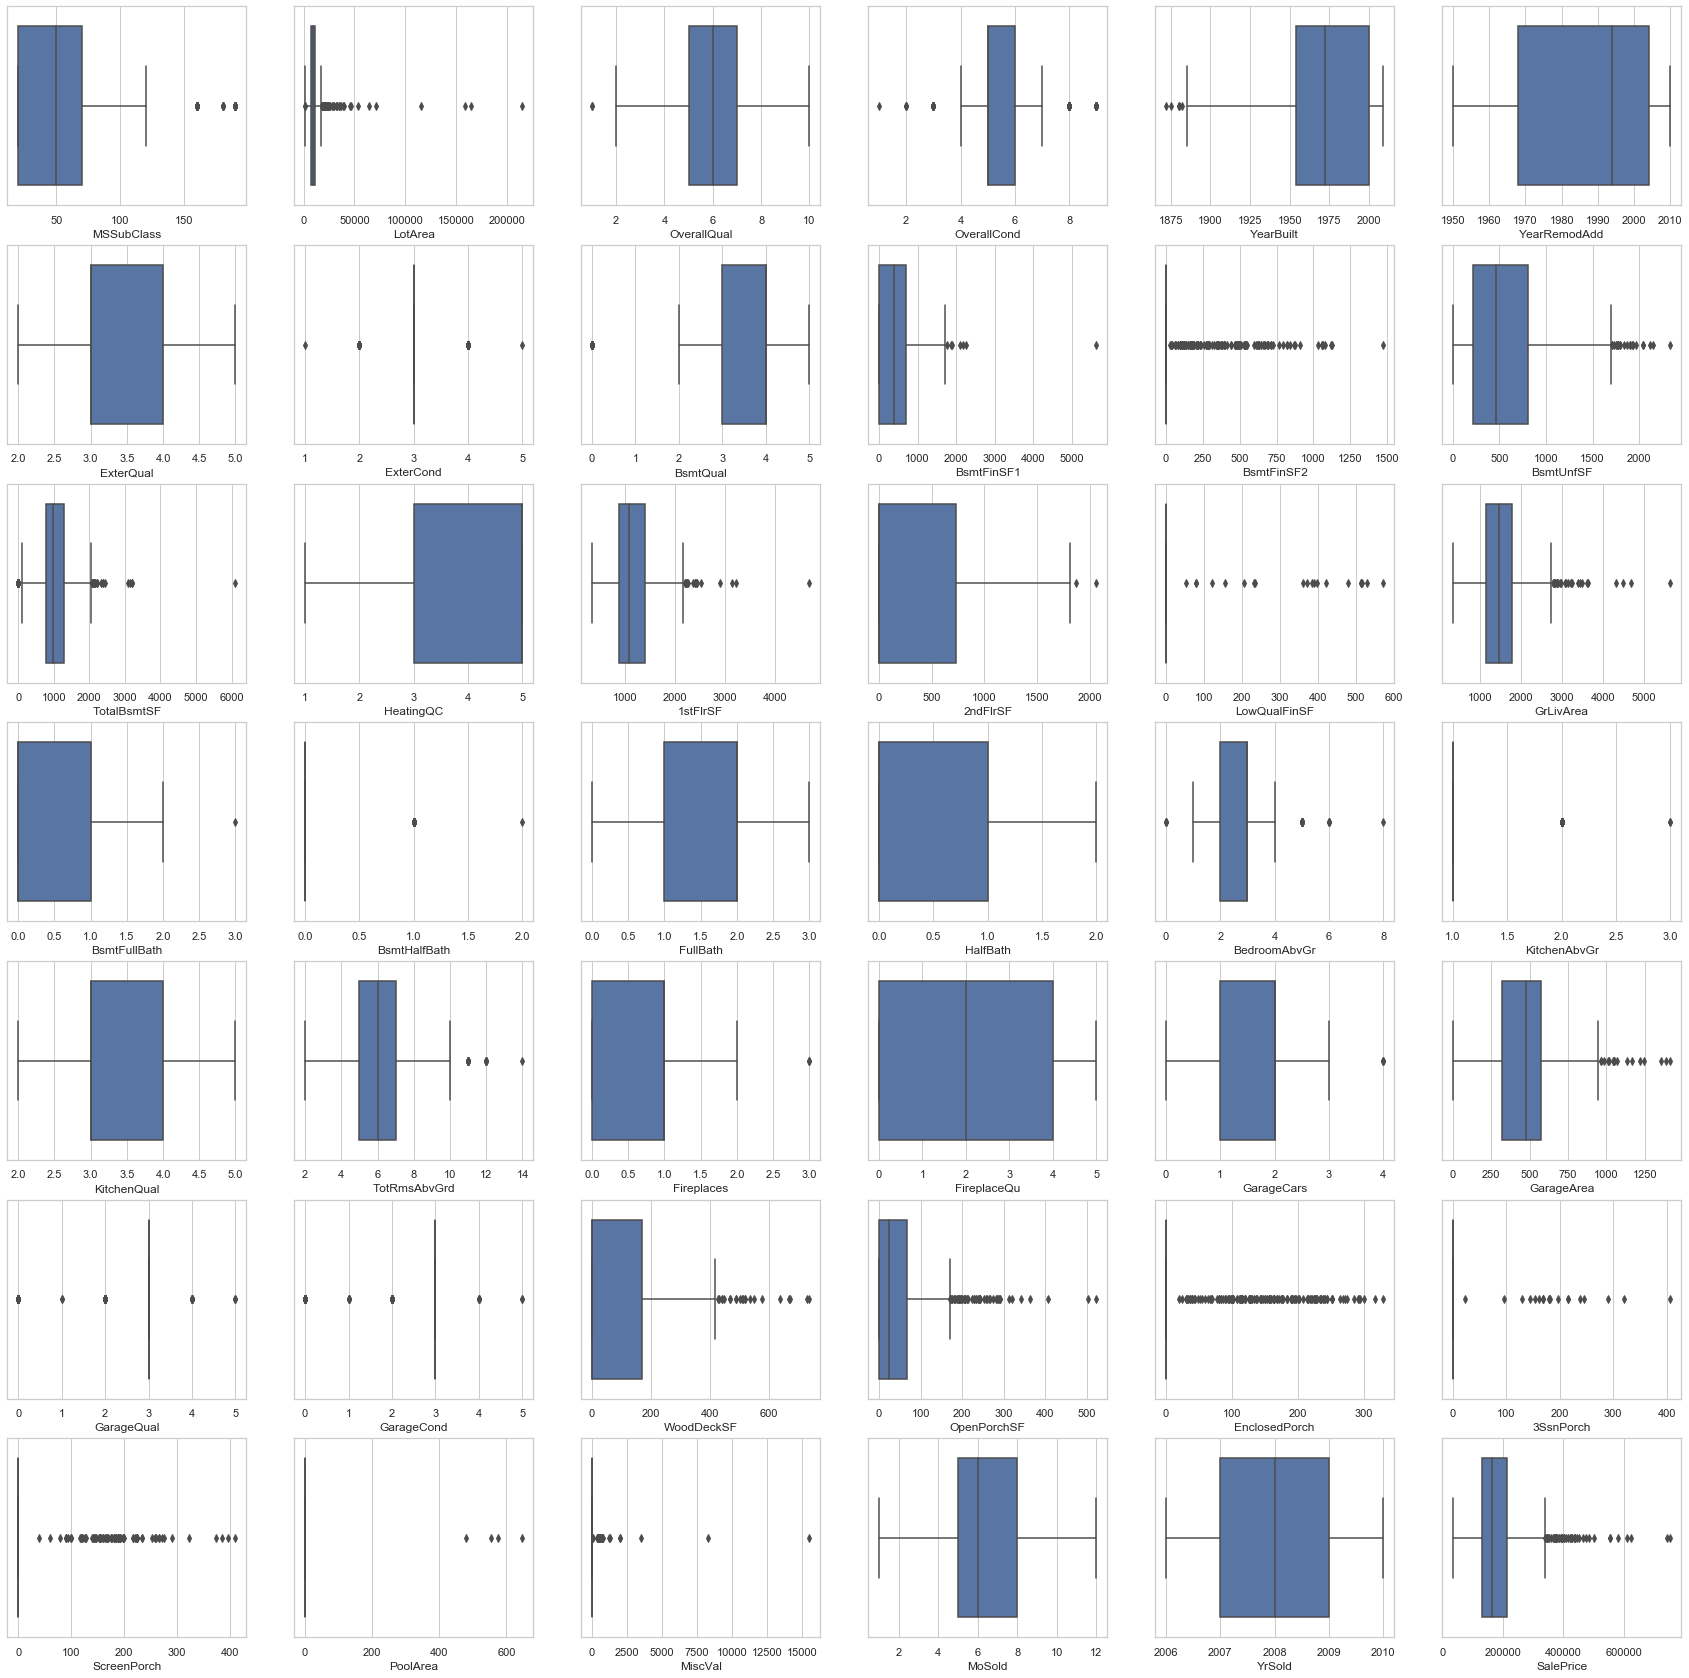

In [45]:
# Create the plot grid
rows = 7
columns = 6

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

In [46]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

In [47]:
train.shape

(1168, 73)

In [48]:
train.head(3).T

,0,1,2
MSSubClass,20,60,30
MSZoning,RL,RL,RM
LotArea,8414,12256,8960
Street,Pave,Pave,Pave
LotShape,Reg,IR1,Reg
...,...,...,...
MoSold,2,4,3
YrSold,2006,2010,2010
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotArea          1168 non-null int64
Street           1168 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non-null object
MasVnrType       1168 non-null object
ExterQual        1168 non

In [50]:
train.to_csv('train-cleaned.csv')